In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Simple EDA

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.shape
#test_df.shape

(1460, 81)

In [4]:
train_df.sample(5)
#train_df.describe(include = "all")
#train_df.info()
#train_df.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1260,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,181000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
1215,1216,20,RL,99.0,7094,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,125000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
1139,1140,30,RL,98.0,8731,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,144000


In [5]:
#test_df.sample(5)
#test_df.describe(include = "all")
#test_df.info()
#test_df.columns

### Dropping ID column

In [6]:
#droppping ID column
test_ID = test_df["Id"]
test_df = test_df.drop("Id", axis = 1)
train_df = train_df.drop("Id", axis = 1)


## Removing Outliers

<AxesSubplot:xlabel='GrLivArea'>

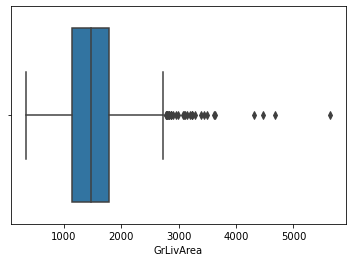

In [7]:
import seaborn as sns
#GrLivArea Outliers
sns.boxplot(x = train_df['GrLivArea'])

In [8]:
train_df = train_df[train_df['GrLivArea'] < 4000]

<AxesSubplot:xlabel='GarageArea'>

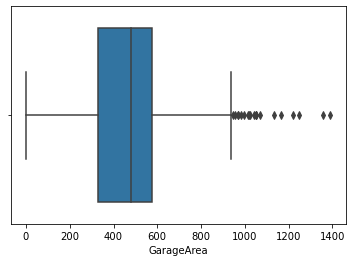

In [9]:
#GarageArea
sns.boxplot(x = train_df['GarageArea'])

In [10]:
train_df = train_df[train_df['GarageArea'] < 1200]

<AxesSubplot:xlabel='TotalBsmtSF'>

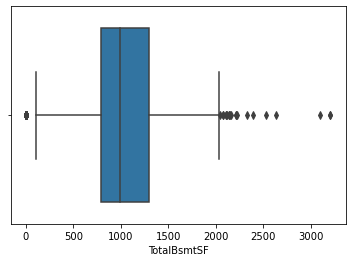

In [11]:
#TotalBsmtSF
sns.boxplot(x = train_df['TotalBsmtSF'])

In [12]:
train_df = train_df[train_df['TotalBsmtSF'] < 2700]

In [13]:
train_df.shape

(1449, 80)

### Combining Train and Test

In [14]:
#storing SalePrice 
y_train = train_df.SalePrice

#dropping SalePrice from train
atrain_df = train_df.drop("SalePrice", axis = 1)

#concat train and test
all_data = pd.concat((atrain_df, test_df)).reset_index(drop = True)


### Finding correlation

In [15]:
# correlation matrix against the Target Variable: using train_DF
corr_matrix = train_df.corr()
corrmat = corr_matrix["SalePrice"].sort_values(ascending=False).to_frame()
corrmat.tail(30)

,SalePrice
FullBath,0.557807
YearBuilt,0.534472
TotRmsAbvGrd,0.534064
YearRemodAdd,0.521260
GarageYrBlt,0.499720
MasVnrArea,0.479523
Fireplaces,0.463807
BsmtFinSF1,0.384539
LotFrontage,0.353935
OpenPorchSF,0.333425


In [16]:
#dropping columns wich have correlation with S.P. near to zero
l = ["MoSold","3SsnPorch", "BsmtFinSF2", "MiscVal", "LowQualFinSF", "YrSold", "PoolArea", "ScreenPorch", "BedroomAbvGr","OverallCond", "MSSubClass", "EnclosedPorch"]
all_data.drop(l,axis = 1)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,NaN,NaN,NaN,WD,Normal
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,NaN,NaN,NaN,WD,Normal
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,NaN,NaN,NaN,WD,Normal
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,NaN,NaN,NaN,WD,Abnorml
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,Y,0,0,NaN,NaN,NaN,WD,Normal
2904,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,24,NaN,NaN,NaN,WD,Abnorml
2905,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,474,0,NaN,NaN,NaN,WD,Abnorml
2906,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,Y,80,32,NaN,MnPrv,Shed,WD,Normal


(37, 37)

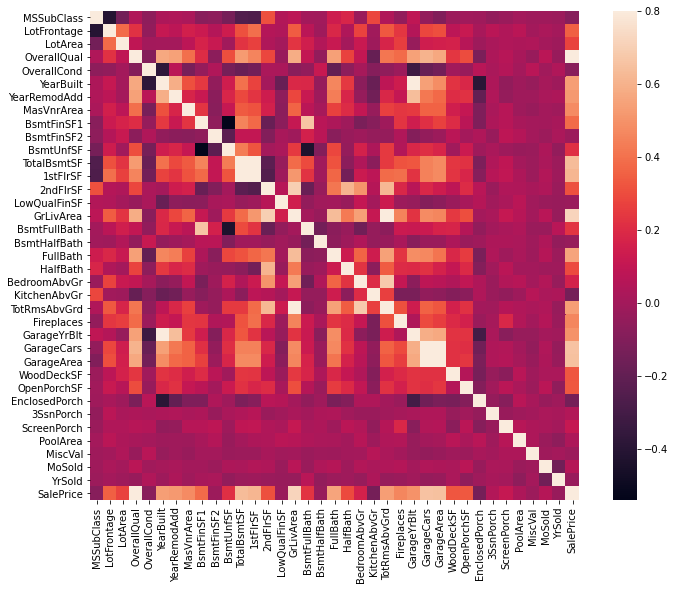

In [17]:
#Correlation matrix
import seaborn as sns
corr = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)  
corr.shape

We see that between any 2 features maximum correlation is upto 0.8

In [18]:
#saleprice correlation matrix
#returns first 6 rows with largest correlation with sale price
k = 6
cols = corrmat.nlargest(k, 'SalePrice')["SalePrice"]
cols.to_frame()
#these are the features that are positively correlated with SalePrice

,SalePrice
SalePrice,1.000000
OverallQual,0.799304
GrLivArea,0.718761
GarageCars,0.654608
GarageArea,0.650826
TotalBsmtSF,0.637124


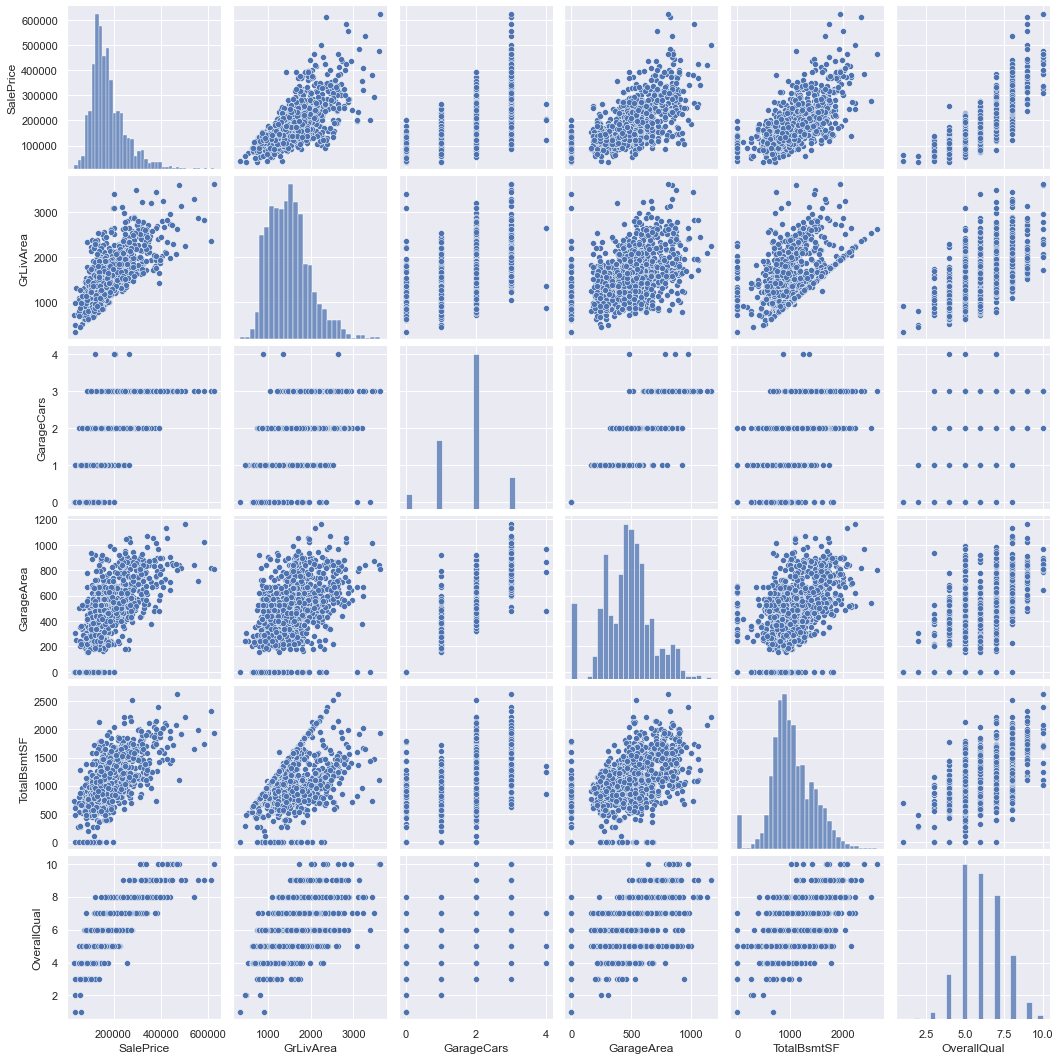

In [19]:
#plotting pairplot for above features
sns.set()
cols = ['SalePrice',  'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'OverallQual']
sns.pairplot(train_df[cols], size = 2.5)
plt.show() 

## Handling Missing Values

In [20]:
ser = all_data.isnull().sum()
df = pd.DataFrame({'Feature': ser.index, 'null_num': ser.values})

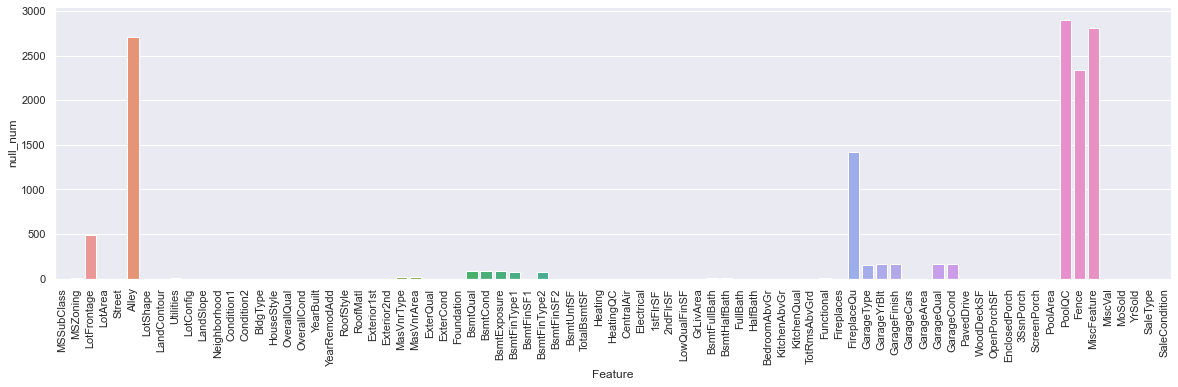

In [21]:
plt.figure(figsize= (20,5))
sns.barplot(x = df.Feature, y = df.null_num)
plt.xticks(rotation = 90)
plt.show()

In [22]:
def NullCountInType(all_data, d_type):
    d={}
    for i in all_data.columns:
        if all_data[i].isnull().sum() != 0 and all_data[i].dtype == d_type:
            d[i] = all_data[i].isnull().sum()
    return d

In [23]:
NullCountInType(all_data, object)

{'MSZoning': 4,
 'Alley': 2710,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 24,
 'BsmtQual': 81,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinType1': 79,
 'BsmtFinType2': 79,
 'Electrical': 1,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 1419,
 'GarageType': 157,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageCond': 159,
 'PoolQC': 2900,
 'Fence': 2338,
 'MiscFeature': 2804,
 'SaleType': 1}

In [24]:
# IMPUTATION BY MEDIAN
# continuous
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

# IMPUTATION BY 0 
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
   
#IMPUTATION BY NONE
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Utilities"].fillna(all_data["Utilities"].mode()[0], inplace = True)
all_data["SaleType"].fillna(all_data["SaleType"].mode()[0], inplace = True)
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#Dropping Column with large missing values
all_data = all_data.drop("PoolQC", axis = 1)
all_data = all_data.drop("MiscFeature", axis = 1)
all_data = all_data.drop("Fence", axis = 1)
all_data = all_data.drop("Alley", axis = 1)

## Label Encoding Nominal Data

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#mapping nominal rankings to numerical for different features:  
ordinal_rev = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive']

 
for col in ordinal_rev: 
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))
    

In [27]:
cat = [i for i in all_data.columns if all_data[i].dtype == np.object]

In [28]:
cat

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'GarageType',
 'SaleType',
 'SaleCondition']

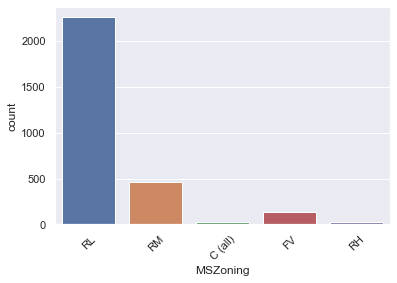

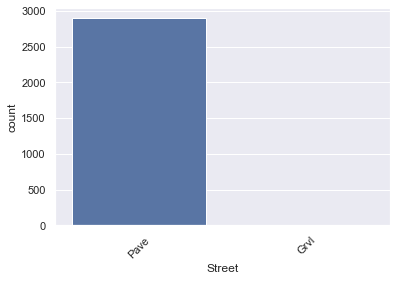

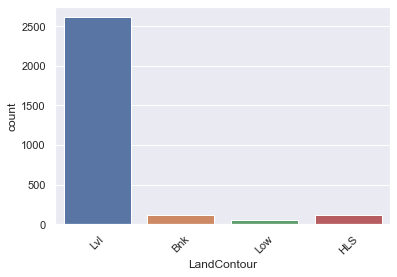

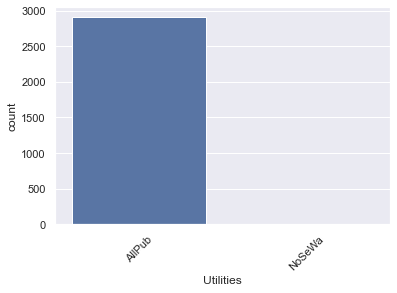

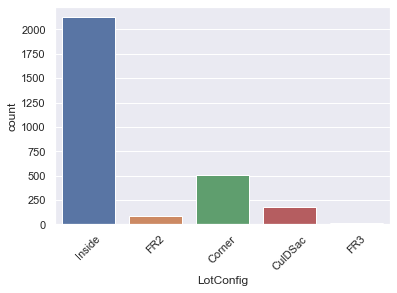

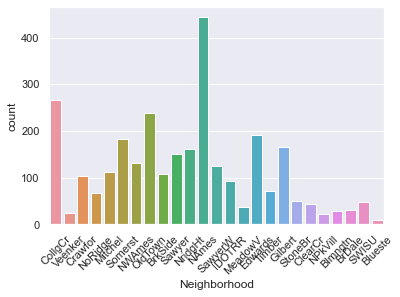

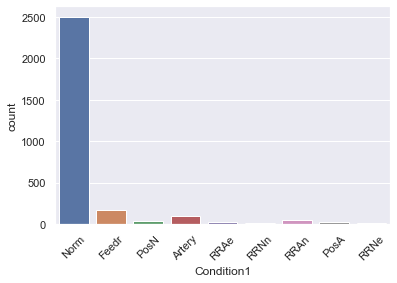

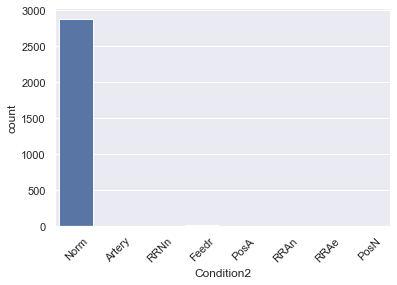

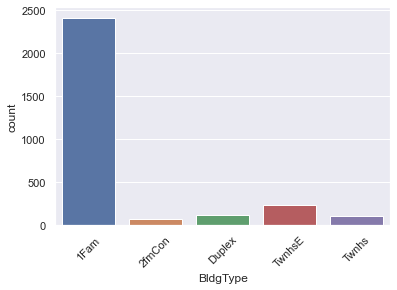

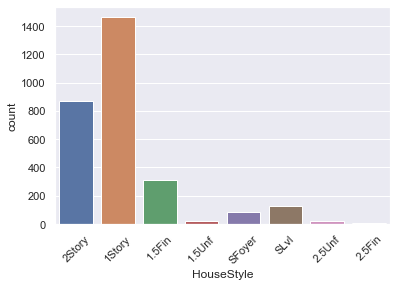

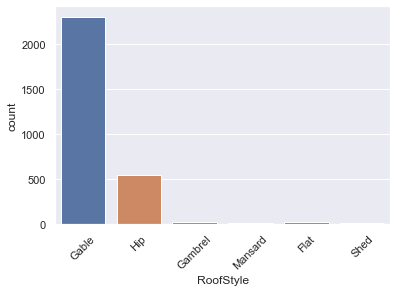

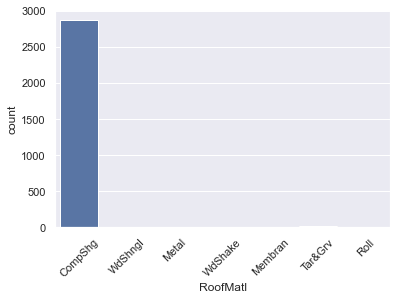

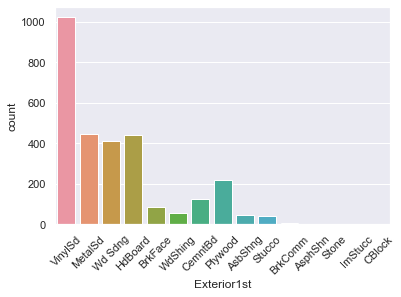

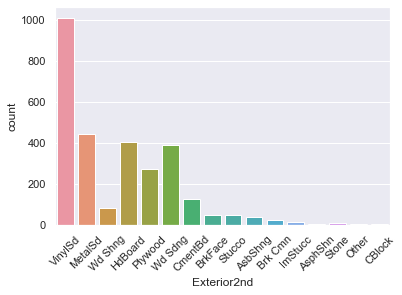

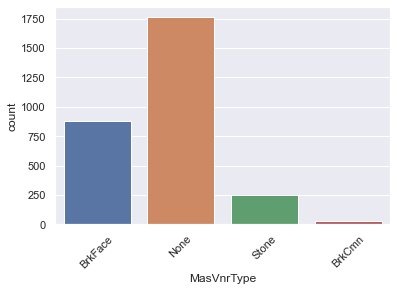

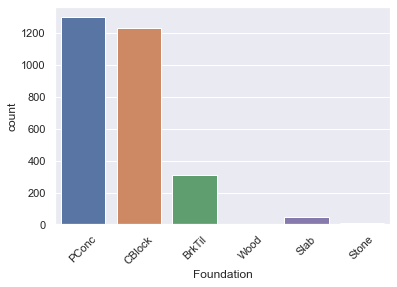

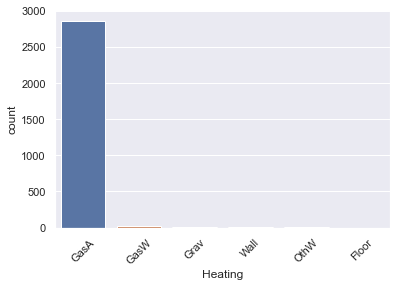

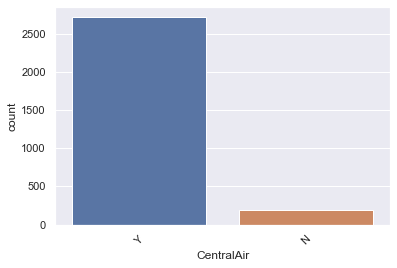

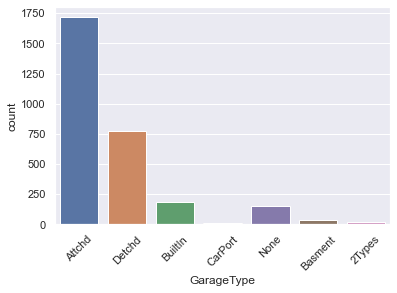

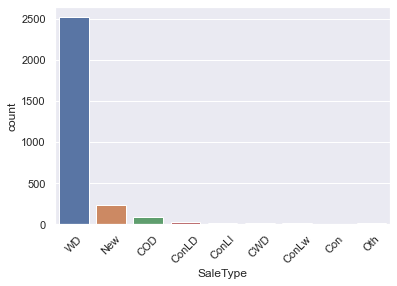

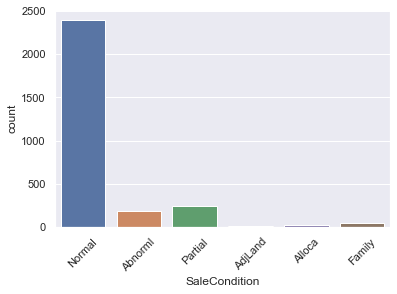

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
for i,col in enumerate(cat):
    plt.figure(i)
    sns.countplot(x=all_data[col])
    plt.xticks(rotation = 45)

In [30]:
all_data = all_data.drop("Utilities", axis=1)   # Skewed 100% -drop 

all_data = all_data.drop("BsmtUnfSF", axis=1)  
all_data = all_data.drop("MasVnrArea", axis=1)  
all_data = all_data.drop("MasVnrType", axis=1)  
all_data = all_data.drop("Exterior2nd", axis=1) # Correlated to Exterior1st -drop 
all_data = all_data.drop("GarageCars", axis=1)  # Correlated to GarageArea Discrete
all_data = all_data.drop("SaleType", axis=1)    # Type of Sale depends on the buyer not the price  

In [31]:
all_data.drop(['Condition2','Heating','RoofMatl','Street'],axis=1,inplace=True) 

In [32]:
all_data.shape

(2908, 64)

In [33]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      d

In [34]:
all_data = all_data.drop(["YearRemodAdd", "ExterCond",'BsmtFinType2',"Fireplaces"], axis = 1)

In [35]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [36]:
all_data_d = pd.get_dummies(all_data)

In [37]:
all_data_d.to_csv('final_dataset.csv', index = False)  

In [38]:
all_data_d[:1449]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,ExterQual,BsmtQual,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,6,4,2003,2,2,...,0,0,0,0,0,0,0,0,1,0
1,20,80.0,9600,3,0,5,7,1976,3,2,...,0,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,0,0,6,4,2001,2,2,...,0,0,0,0,0,0,0,0,1,0
3,70,60.0,9550,0,0,6,4,1915,3,4,...,0,0,1,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,7,4,2000,2,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,62.0,7917,3,0,5,4,1999,3,2,...,0,0,0,0,0,0,0,0,1,0
1445,20,85.0,13175,3,0,5,5,1978,3,2,...,0,0,0,0,0,0,0,0,1,0
1446,70,66.0,9042,3,0,6,8,1941,0,4,...,0,0,0,0,0,0,0,0,1,0
1447,20,68.0,9717,3,0,4,5,1950,3,4,...,0,0,0,0,0,0,0,0,1,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_data_d = scaler.fit_transform(all_data_d)

In [40]:
train_df.shape

(1449, 80)

In [41]:
train_data = all_data_d[:1449]
test_data = all_data_d[1449:]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data, y_train, random_state=42, test_size=.33)

In [43]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train, Y_train) 

#r2_score
regressor.score(X_test, Y_test)

0.8824139223689568

Text(0, 0.5, 'Actual Price')

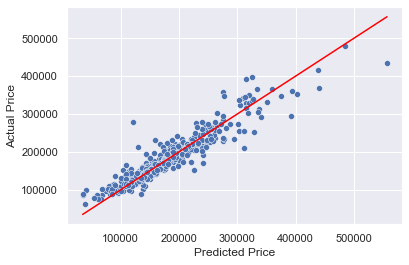

In [45]:
sns.scatterplot(x = Y_test, y = Y_pred)
sns.lineplot(x = Y_test, y =  Y_test, color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

In [46]:
#Absolute Error percentage
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [47]:
MAPE(Y_test, Y_pred)

10.116161975384788

In [48]:
import joblib

In [49]:
joblib.dump(regressor, "model/model.bin")

['model/model.bin']